In [50]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
YP = pd.read_csv(r'/mnt/c/OP2.csv', header = 0, index_col=0)

In [52]:
YP

,ANN9,nearest,surface,dmp1,fgf23,sost,fgf23+sost+,dmp1+sost+
ID,,,,,,,,
67630,117.2170,74.6860,-0.115270,835.154,303.3390,351.913,559.979,1377.660
67632,43.3083,19.0620,-4.757660,713.896,79.4779,165.924,340.512,1259.700
67633,38.4046,19.4849,-5.593550,699.213,64.0239,160.358,322.257,1241.340
67634,43.1519,19.0620,-4.833570,712.258,70.7052,148.485,332.014,1255.220
67635,37.9039,18.6230,-0.406739,797.277,149.2260,167.138,353.951,1309.410
...,...,...,...,...,...,...,...,...
101440,55.7044,32.8195,-12.359500,157.761,148.0850,182.280,239.840,589.738
101441,57.5196,32.8195,-10.816300,131.268,137.9260,161.043,236.097,593.667
101442,64.4366,19.3467,-22.783900,114.489,97.4181,138.434,229.151,597.732


In [53]:
YP_subset = YP.sample(n = 2000)

In [54]:
YP_subset_original = YP.sample(n = 2000)

In [55]:
YP_subset_UMAP = YP_subset

In [56]:
YP_subset

,ANN9,nearest,surface,dmp1,fgf23,sost,fgf23+sost+,dmp1+sost+
ID,,,,,,,,
96514,49.7350,27.0123,-10.30180,69.8601,47.19260,99.71880,97.81040,277.7280
79809,39.2362,23.5250,-76.56090,34.5067,20.53160,10.71330,20.53160,94.6091
84437,41.5538,29.5313,-39.61420,18.6590,71.06410,82.80640,93.38950,196.9980
76331,28.9756,21.2799,-55.24140,133.2540,26.21520,27.37610,26.21520,251.5610
86986,34.4192,18.7736,-13.94250,64.1720,52.93460,53.55930,52.93460,110.3280
...,...,...,...,...,...,...,...,...
73143,32.1307,24.1857,-60.98110,252.6220,4.91108,5.01174,4.91108,711.2660
74345,46.5878,32.8934,-8.28934,513.8860,31.76050,291.87500,290.66300,1011.1800
85317,36.0160,21.8080,-4.95532,254.1060,52.96290,253.55200,251.98900,415.8690


In [57]:
from plotly.offline import init_notebook_mode, iplot

In [58]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

In [59]:
corr = YP_subset.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Correlation Plot of Player Skills")
fig = dict(data=data, layout=layout)
iplot(fig)

In [60]:
from sklearn.decomposition import PCA
pca = PCA().fit(YP_subset)

In [61]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="YOPRO+ Dataset - PCA Explained Variance || 100% achieved at 5 components")
fig = dict(data=data, layout=layout)
iplot(fig)

In [62]:
pca = PCA(n_components=5)
skillsPCA = pca.fit_transform(YP_subset)

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [64]:

X=YP_subset
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [66]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

In [67]:
dfskillsPCA

,0,1,2,3,4,cluster
0,-171.801669,-5.317114,5.536930,18.429057,-18.196723,3
1,-358.686994,-125.146601,18.146945,-10.203114,3.587062,0
2,-268.097850,-1.983985,5.900242,19.448493,9.646768,0
3,-172.531714,-129.429149,17.578837,2.126768,1.041485,0
4,-322.841794,-80.506307,60.663428,15.565516,9.079264,0
...,...,...,...,...,...,...
1995,274.626928,-141.067360,-146.271005,-5.162425,-0.996462,1
1996,708.137150,134.446148,66.417670,30.315815,-124.034753,4
1997,64.041807,116.221058,161.242498,31.812922,-91.757848,2
1998,-201.532061,-78.777398,-42.911232,5.416700,5.952267,0


In [68]:
from sklearn.manifold import TSNE
X1 = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X1)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [70]:
skillsPCA_labels

array([3, 0, 0, ..., 2, 0, 0], dtype=int32)

In [71]:
YP_subset['cluster'] = skillsPCA_labels

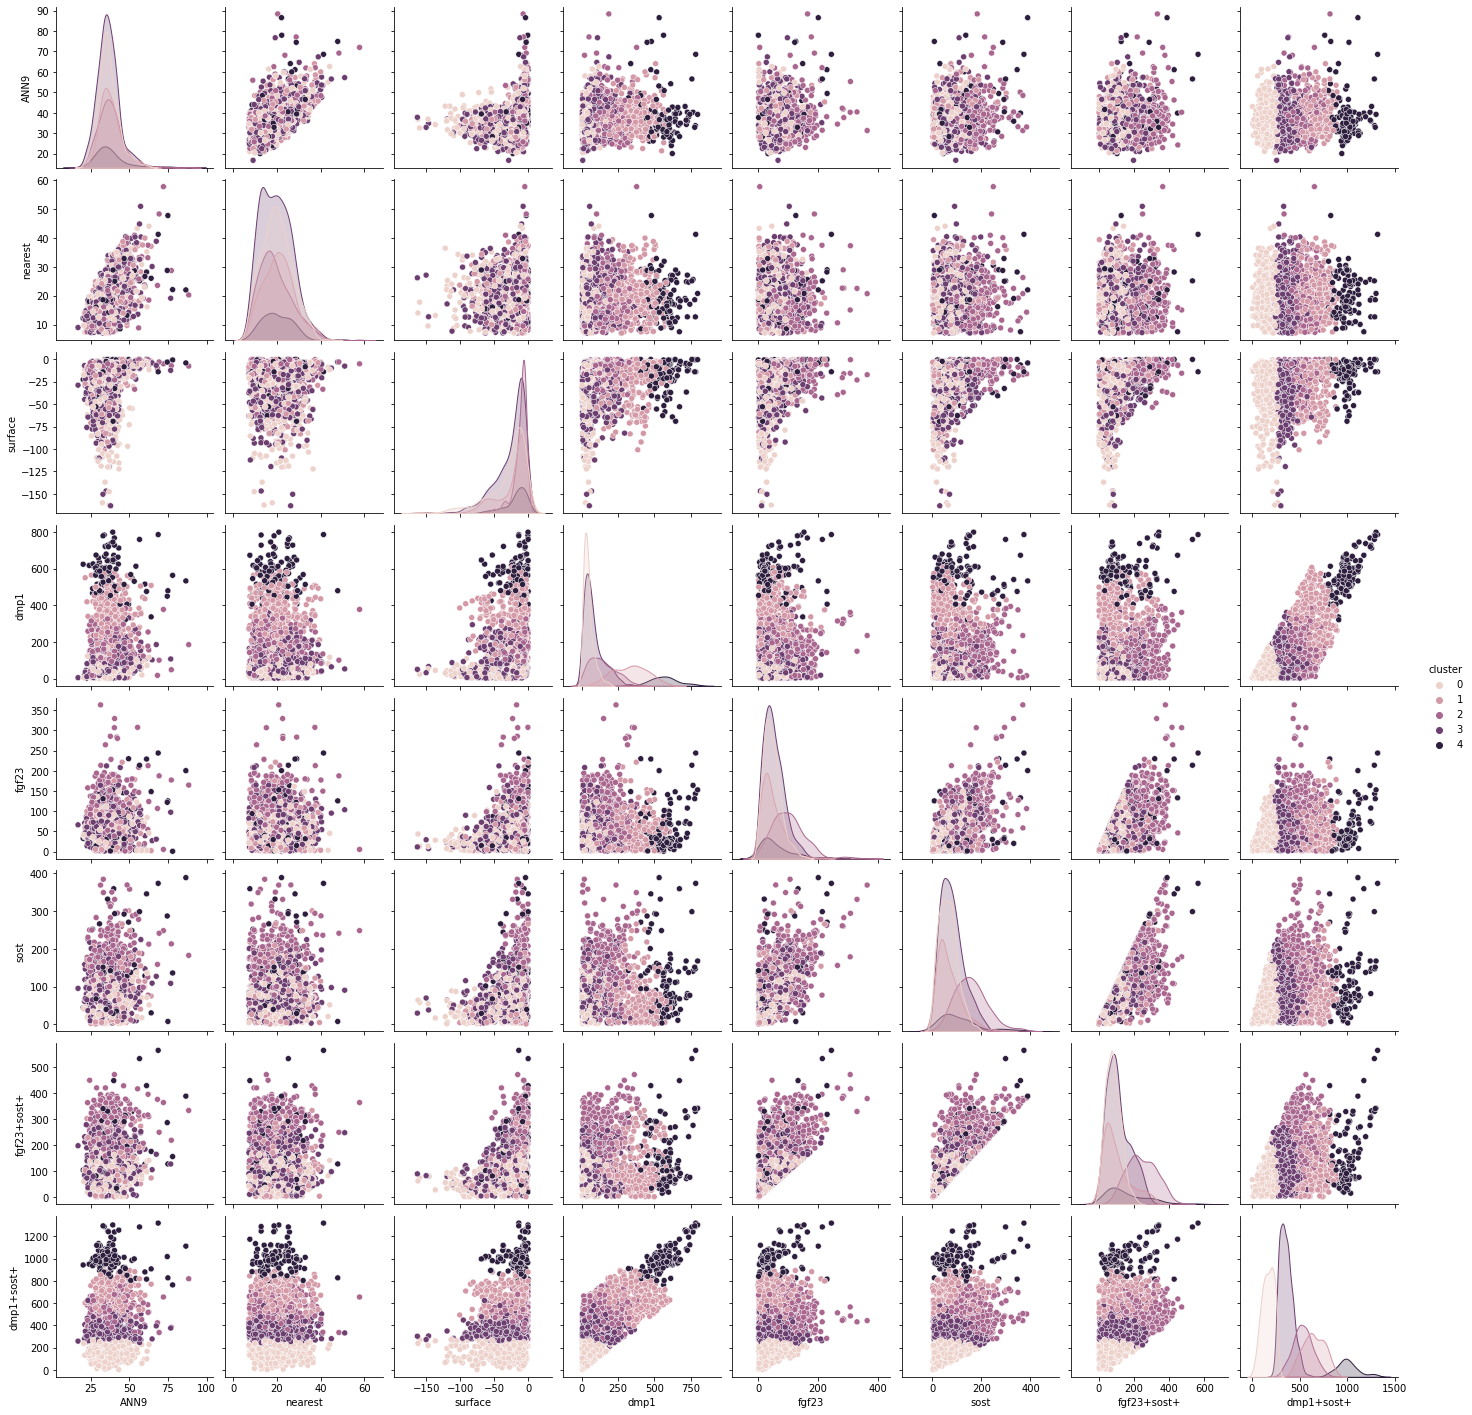

In [72]:
sns.pairplot(YP_subset, hue='cluster');

In [73]:
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(YP_subset)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = skillsPCA_labels
dfskillsPCA2.columns = ['x1','x2','cluster']

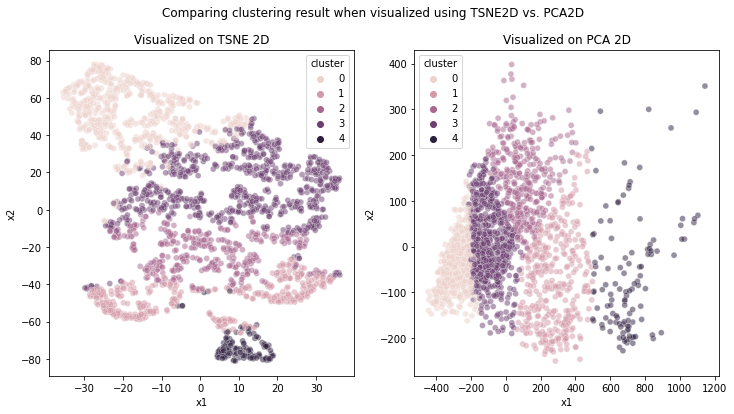

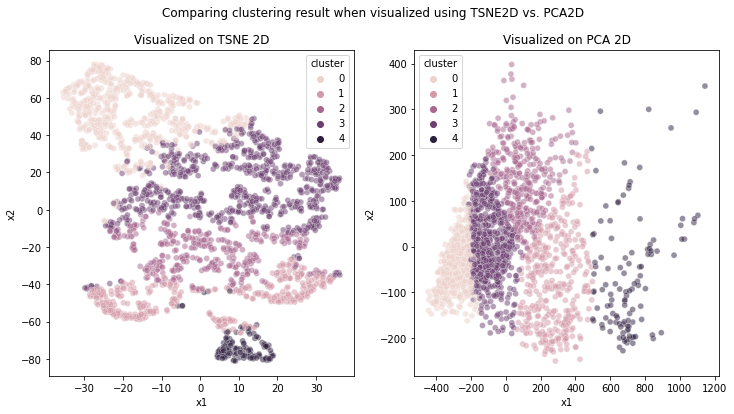

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [75]:
import umap

In [76]:
reducer = umap.UMAP()

In [77]:
YP_subset_UMAP

,ANN9,nearest,surface,dmp1,fgf23,sost,fgf23+sost+,dmp1+sost+,cluster
ID,,,,,,,,,
96514,49.7350,27.0123,-10.30180,69.8601,47.19260,99.71880,97.81040,277.7280,3
79809,39.2362,23.5250,-76.56090,34.5067,20.53160,10.71330,20.53160,94.6091,0
84437,41.5538,29.5313,-39.61420,18.6590,71.06410,82.80640,93.38950,196.9980,0
76331,28.9756,21.2799,-55.24140,133.2540,26.21520,27.37610,26.21520,251.5610,0
86986,34.4192,18.7736,-13.94250,64.1720,52.93460,53.55930,52.93460,110.3280,0
...,...,...,...,...,...,...,...,...,...
73143,32.1307,24.1857,-60.98110,252.6220,4.91108,5.01174,4.91108,711.2660,1
74345,46.5878,32.8934,-8.28934,513.8860,31.76050,291.87500,290.66300,1011.1800,4
85317,36.0160,21.8080,-4.95532,254.1060,52.96290,253.55200,251.98900,415.8690,2


In [78]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [79]:
data = YP_subset_UMAP[
    [
        "ANN9",
        "dmp1",
        "fgf23",
        "sost",
        'nearest',
        'surface',
        'fgf23+sost+',
        'dmp1+sost+'
    ] 
].values
scaled_data = StandardScaler().fit_transform(data)

In [80]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(2000, 2)

In [81]:
embedding

array([[ 3.9057267,  9.258145 ],
       [ 8.353864 ,  7.2453756],
       [ 6.5754905,  8.346429 ],
       ...,
       [ 1.5947429, 11.416863 ],
       [ 9.16505  ,  8.968442 ],
       [ 8.274667 , 11.376768 ]], dtype=float32)

In [82]:
embedding = pd.DataFrame(embedding)
embedding['cluster'] = skillsPCA_labels

In [83]:
embedding

,0,1,cluster
0,3.905727,9.258145,3
1,8.353864,7.245376,0
2,6.575490,8.346429,0
3,7.911268,8.535231,0
4,6.771829,10.946468,0
...,...,...,...
1995,5.069551,5.711927,1
1996,1.344356,10.550865,4
1997,1.594743,11.416863,2
1998,9.165050,8.968442,0


In [84]:
embedding.columns = ['x1','x2','cluster']

In [85]:
embedding

,x1,x2,cluster
0,3.905727,9.258145,3
1,8.353864,7.245376,0
2,6.575490,8.346429,0
3,7.911268,8.535231,0
4,6.771829,10.946468,0
...,...,...,...
1995,5.069551,5.711927,1
1996,1.344356,10.550865,4
1997,1.594743,11.416863,2
1998,9.165050,8.968442,0


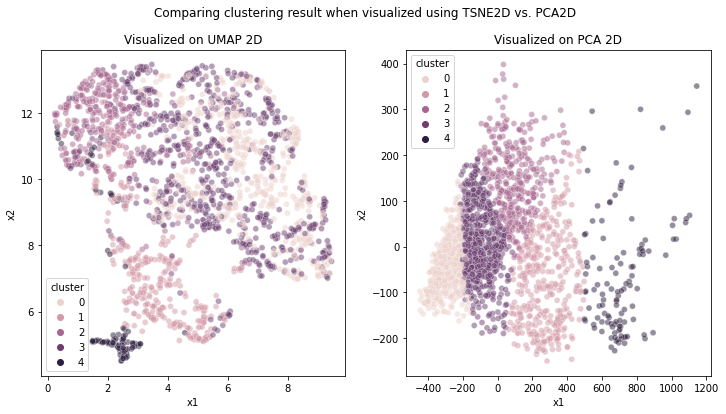

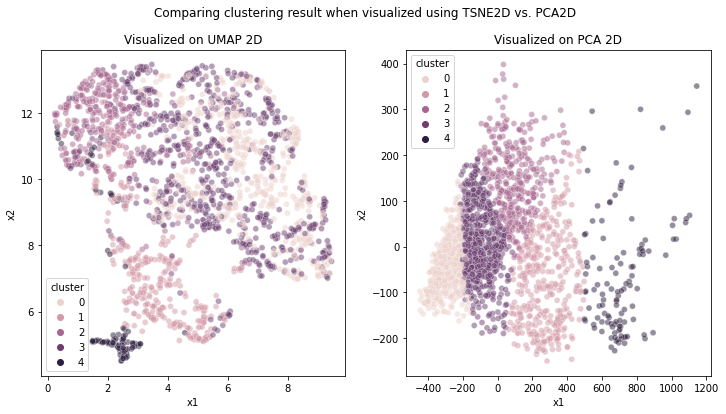

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=embedding,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on UMAP 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [87]:
YP_subset_original

,ANN9,nearest,surface,dmp1,fgf23,sost,fgf23+sost+,dmp1+sost+
ID,,,,,,,,
76263,33.0855,12.45980,-7.02022,181.76500,25.67940,37.5149,62.3066,363.1460
86996,32.3942,18.59900,-20.76130,58.52220,39.50280,57.2583,58.2596,156.7310
83826,38.3488,23.43120,-39.44320,32.24710,42.92150,44.0250,42.9215,117.6270
89364,33.6085,15.89960,-16.79690,151.20400,120.99300,185.0200,182.1490,538.0230
78014,36.8046,26.07010,-15.04820,58.90410,6.50324,60.4294,64.3670,133.5140
...,...,...,...,...,...,...,...,...
95041,39.7881,17.64810,-7.83300,80.96590,32.68490,61.0546,61.3030,132.9630
72124,22.3629,11.78480,-15.11930,287.80200,29.52620,35.3911,49.5503,416.5720
78494,36.4752,19.80410,-8.53858,8.26531,70.90050,12.3577,83.7568,288.3790


In [88]:
import plotly.express as px

In [89]:
fig2 = px.scatter_3d(YP_subset_original, x="dmp1", y="fgf23",z="sost",
                     color="ANN9")
fig2.update_layout(title="4 Features Representation")
fig2.show()

In [90]:
dftsne

,x1,x2,cluster
0,-7.418273,32.632195,3
1,-18.456549,70.206963,0
2,-17.585846,47.090889,0
3,5.752500,35.413837,0
4,-32.595509,64.206627,0
...,...,...,...
1995,27.739834,-46.645031,1
1996,17.008570,-73.236694,4
1997,-22.304228,-14.840584,2
1998,9.141047,47.094376,0


In [91]:
YP_subset_UMAP

,ANN9,nearest,surface,dmp1,fgf23,sost,fgf23+sost+,dmp1+sost+,cluster
ID,,,,,,,,,
96514,49.7350,27.0123,-10.30180,69.8601,47.19260,99.71880,97.81040,277.7280,3
79809,39.2362,23.5250,-76.56090,34.5067,20.53160,10.71330,20.53160,94.6091,0
84437,41.5538,29.5313,-39.61420,18.6590,71.06410,82.80640,93.38950,196.9980,0
76331,28.9756,21.2799,-55.24140,133.2540,26.21520,27.37610,26.21520,251.5610,0
86986,34.4192,18.7736,-13.94250,64.1720,52.93460,53.55930,52.93460,110.3280,0
...,...,...,...,...,...,...,...,...,...
73143,32.1307,24.1857,-60.98110,252.6220,4.91108,5.01174,4.91108,711.2660,1
74345,46.5878,32.8934,-8.28934,513.8860,31.76050,291.87500,290.66300,1011.1800,4
85317,36.0160,21.8080,-4.95532,254.1060,52.96290,253.55200,251.98900,415.8690,2


In [92]:
avgs_raw = YP_subset_UMAP

In [93]:
avgs_raw = avgs_raw.groupby('cluster').mean()

In [94]:
avgs_raw['surface'] = avgs_raw['surface'].abs()

In [95]:
cols = list(avgs_raw.columns.values)
cols

['ANN9',
 'nearest',
 'surface',
 'dmp1',
 'fgf23',
 'sost',
 'fgf23+sost+',
 'dmp1+sost+']

In [96]:
avgs_raw_new = avgs_raw.reindex(columns=['ANN9', 'nearest', 'surface', 'dmp1', 'fgf23', 'sost','fgf23+sost+','dmp1+sost+'])

<AxesSubplot:xlabel='cluster'>

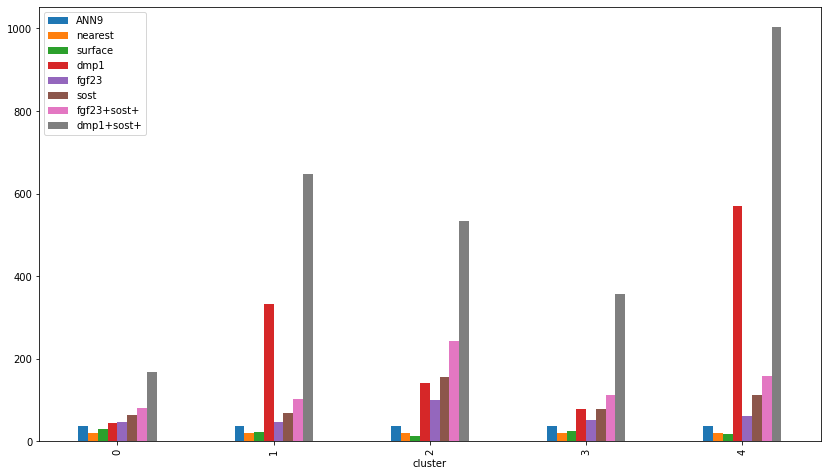

In [97]:
avgs_raw_new.plot.bar(figsize = (14,8))

In [98]:
YP_subset_UMAP.cluster.value_counts()

3    672
0    515
1    350
2    348
4    115
Name: cluster, dtype: int64